## **NNTI 19/20 Project 1:  PCA and Logistic Regression**

## **Deadline: 17 December 2019, 23:59**


---



**Important:** For all computations in this project, please use the torch library. The torch package contains data structures for multi-dimensional tensors and mathematical operations over these are defined. Additionally, it provides many utilities for efficient serializing of Tensors and arbitrary types, and other useful utilities.

# **1. Principal component analysis (PCA) [12 points]**

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA is also a very useful dimesnionality reduction technique. In the folowing, we explore how to apply PCA on the CIFAR dataset.

CIFAR 10 is a collection images which is commonly used to train machine learning and computer vision algorithms. This dataset contains 50000 training images and 10000 validation images such that the images can be classified between 10 different classes.  The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

**Task 1. Getting the dataset using torchvision**

Torchvision is a pytorch package which helps in loading datasets in the image domain. It has dataloaders for common datasets like CIFAR 10, MNIST etc. Complete the code below to download the CIFAR dataset using torchvision. Torchvision returns the dataset in which every image is stretched out into a 3072-dimensional row vector.

Complete the code below to load the CIFAR dataset using torchvision. Print the labels and some images with the corresponding labels.
[1.5 points]

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:02, 84742207.43it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


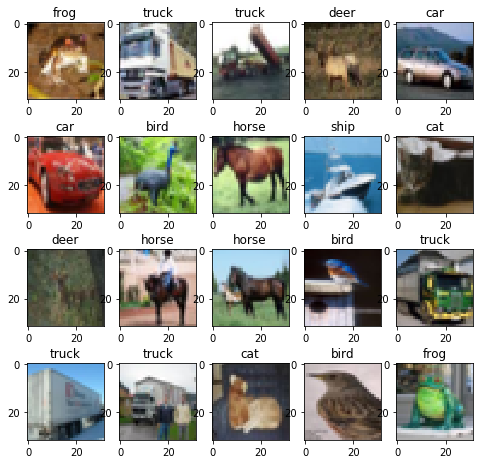

In [0]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# TODO: define transformation function using torchvision.transforms to convert images into pytorch tensors
transform = transforms.Compose([transforms.ToTensor()])

# TODO: use torchvision.datasets to load CIFAR-10 train dataset and the defined transform
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# TODO: use torch.utils.data.DataLoader to get a python Iterable over the dataset, use batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20)

# TODO: get the first batch of images of the dataset using python Iterator
train_iter = next(iter(train_loader))
images, labels = train_iter[0], train_iter[1]

# the labels are numbered from 0 - 9 as follows
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# TODO: plot the first batch of images of the training dataset
fig=plt.figure(figsize=(8, 8))
for i in range(1, len(images)+1):
  fig.add_subplot(4,5,i)
  plt.title(classes[labels[i-1]])
  plt.imshow(images[i-1].permute(1, 2, 0))



**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 2. Centering and normalization** 

PCA is applied on data after centering and normalization.
Complete the functions below to center and normalize the images. 

[1 point]

In [0]:
def center(images):
    # TODO : substract the mean from the images
    centered_images = images-torch.mean(images)
    return centered_images

def normalize(images):
    # TODO : normalize the centered images by dividing by the standard deviation
    normalized_images = images/torch.std(images)
    return normalized_images

def transform(images):
  # reshaping the images as a 3072-dimensional row vector
  images = images.reshape((images.size()[0], 3072))
  images = center(images)
  images = normalize(images)
  return images

**Points**: $0.0$ of $1$
**Comments**: None

**Task 3. Implementing PCA** 

PCA takes in the data points and the target dimension which is lesser than the original dimension of the data. In this case, the data matrix is of [number of images, 3072]. 

The following presents the main steps to perform a slightly modified version of PCA. This function takes as input the original data points, and one of the two parameters: target_dim or target_variance. If target_dim is given then return the projected data into a target_dim-dimensional space. Otherwise, the function returns data projected into a low dimensional space which captures a ratio of target_variance from the data. 


1.   Trasnform the data by centering and normalizing the images
2.   Get the data matrix of shape [#images, #dimensions] 
3.   Compute the covariance matrix of the data matrix
4.   Compute the eigenvectors and eigenvalues of the covariance matrix
5.   Sort eigenvectors by decreasing eigenvalues
6.   If target_variance is given then compute the target_dim corresponding to it.
7.   Select the top target_dim eigenvectors to get the encoding matrix of shape [target_dim, #dimesnions]
6.   Multiply the data matrix with the encoding matrix to project the data into the low dimensional space

Complete the function below to implement PCA and return the reduced dimension set and captured variance.

[8 points]

In [0]:

'''
PCA function must take the original images and either the number of target
dimensions or the ratio of the total variance to be captured from the data

'''
def PCA(images, target_dim = 0, target_variance = 0): 
  # transform the data
  data = transform(images)

  data=data.T
  print("INsida PCA, data shape: ",data.shape)
  # TODO : compute the covariance matrix of the data points
  cov = np.dot(data, data.T)/len(data)
  
  # TODO: compute the eigenvectors and eigenvalues of the covariance matrix
  w, lamb = np.linalg.eig(cov)

  # TODO: sort eigenvectors by decreasing eigenvalues
  idxs = np.flip(w.argsort())
  eigval_sort = w[idxs]
  eigvec_sort = []
  for idx in idxs:
    eigvec = lamb[idx]
    eigvec_sort.append(eigvec)

  if(target_variance != 0):
    # TODO: compute target_dim such that target_variance is captured from the data
    sigval = [np.abs(i)/np.sum(eigval_sort) for i in eigval_sort]
    cumsum = 0
    for i in range(len(sigval)):
      if cumsum > target_variance:break
      else: cumsum = cumsum+sigval[i]
    target_dim = i 

  # TODO: choose $target_dim eigenvectors corresponding to the low dimensional subspace
  encoding_matrix = eigvec_sort[:target_dim]
 
  
  # TODO: multiply the data matrix with the encoding matrix to get the reduced dataset
  reduced_data = np.dot(encoding_matrix, data)

  return reduced_data, target_dim, encoding_matrix

**Points**: $0.0$ of $8$
**Comments**: None

**Task 4. PCA for dimensionality reduction** 

PCA is normally used to bring to acheive dimensionality reduction for high       dimensional datasets. This is acheived by bringing the dataset into a low dimensional subspace while still capturing most of the variance in the dataset. Use the above function to reduce the dataset into a 50 dimensional subspace.  

[0.5 point]

In [0]:
# TODO : use dataloader with batch size 2000 to load the dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2000)

# TODO : apply PCA with target_d = 50 on the first batch (contains 2000 images) from the dataloader
train_iter = next(iter(train_loader))
images, labels = train_iter[0], train_iter[1]
reduced_data, target_dim, encoding_matrix = PCA(images, target_dim = 50, target_variance = 0)

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 5. PCA for visualization**

PCA is often used for visualization purposes.  Visually exploring the data can become challenging when we have more than 3 features. But this can be a very useful tool when dealing with data related problems. 

Please followe the steps below and complete the folowing code to create a scatterplot of the first and second principal components. Make use of matplotlib for the following.

1.   Create a 2D scatter plot. For each data point, plot the first principle component on $x$ axis and the second principle component on $y$ axis, use different colors for each class.
2.   Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3.   Add legends for each class.
 
Are the first two components discriminative enough to classify points from any pair of the ten classes ?
[1 point]

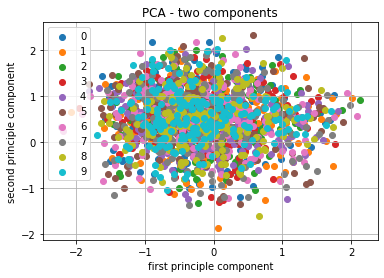

In [0]:
# create a scatterplot of the first two dimensions of the reduced data
x=reduced_data[0]
y=reduced_data[1]
figure = plt.figure()
plot = figure.add_subplot(111) 
plt.xlabel('first principle component')
plt.ylabel('second principle component')
plt.title('PCA - two components')
classes = list(range(0,10))
for label in classes:
    plot.scatter(x[np.where(labels==label)],y[np.where(labels==label)], label = label)
plot.legend(classes)
plt.grid(b=None, which='major', axis='both')

**Points**: $0.0$ of $1$
**Comments**: None


---



# **2. Logistic regression [18 points]**


Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In this section, we explore the binary logistic regression. We change the clsssification problem with 10 classes into a binary classification problem by considering only the points from the classes *'ship'* and *'car'*.

![Logistic regression image](https://drive.google.com/uc?id=1eRF1-2qnQYAkkCDpAwROj5MiMKzct2x0)


**Task 6. Generating training dataset** 

Since logistic regression is a classification problem with two classes, we need a labelled dataset with two classes as the training set. Complete the function to obtain the datapoints corresponding to labels *'ship'* and *'car'*. 

Please follow the steps below: 

1. Load the train and test sets of CIFAR 10 from torchvision using a batch size of 1024.
2. Split the training samples by 80:20 ratio into train set and validation set respectively. 
3. Filter the datasets to only have images with classes 'ship' or 'car'. The corresponding labels are 8 and 1 respectively.
4. The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
5. Define a [torch.utils.data.Dataset](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html) with the filtered tensors of images and the newly created labels.
6. Define a dataloader for training and validation datasets with batch_size 64.

[1.5 point]


In [238]:
# TODO : generate the train, validation, and test sets from CIFAR 10
import torch 
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset, DataLoader
import numpy as np

#Load the train and test sets of CIFAR 10 from torchvision using a batch size of 1024.
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#Split the training samples by 80:20 ratio into train set and validation set respectively.
train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

print(len(train_dataset))
print(len(validation_dataset))
print(len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1024)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=1024, shuffle=True)

#Filter the datasets to only have images with classes 'ship' or 'car'. The corresponding labels are 8 and 1 respectively.
#The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
#Define a torch.utils.data.Dataset with the filtered tensors of images and the newly created labels.
filtered_train_dataset=[]
for train_iter in train_loader:
  images, labels = train_iter[0], train_iter[1]
  for i,image in enumerate(images):
    if labels[i]== 1 or labels[i]== 8:
      if labels[i] == 8:labels[i]=0 
      filtered_train_dataset.append([image,labels[i]])

filtered_validation_dataset=[]
for train_iter in validation_loader:
  images, labels = train_iter[0], train_iter[1]
  for i,image in enumerate(images):
    if labels[i]== 1 or labels[i]== 8:
      if labels[i] == 8:labels[i]=0 
      filtered_validation_dataset.append([image,labels[i]])

filtered_test_dataset=[]
for train_iter in test_loader:
  images, labels = train_iter[0], train_iter[1]
  for i,image in enumerate(images):
    if labels[i]== 1 or labels[i]== 8:
      if labels[i] == 8:labels[i]=0 
      filtered_test_dataset.append([image,labels[i]])

training_data = filtered_train_dataset
validation_data = filtered_validation_dataset
test_data = filtered_test_dataset

# Define a dataloader for training and validation datasets with batch_size 64.
filtered_train_loader = torch.utils.data.DataLoader(filtered_train_dataset, shuffle=True, batch_size=64)
filtered_validation_loader = torch.utils.data.DataLoader(filtered_validation_dataset, shuffle=True, batch_size=64)
filtered_test_loader = torch.utils.data.DataLoader(filtered_test_dataset, shuffle=True, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
40000
10000
10000


In [223]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))


8007
1993
2000


**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 7. Get the dataset in the low dimensional subspace** 

Apply pca on the original data points to get new data matrix.
The target dimensions must capture 90% of the variance in the data.
Use the previously defined PCA function for this task. In the coming sections, we will be using this projected training dataset to training the logistic regression model.

[0.5 point]


In [246]:
#TODO : use the pca function defined in task 3 to reduce dimensions of the train set 
#train_iter = next(iter(filtered_train_loader))
#images, labels = train_iter[0], train_iter[1]
##images=transform(images)
#print(images.shape)
#reduced_data, target_dim, encoding_matrix = PCA(images, target_dim = 0, target_variance = 0.9)
#print(reduced_data.shape)
#data=torch.tensor([])

#
data=[]
#for batch_images,batch_labels in filtered_train_loader:
batch_images,batch_labels = next(iter(filtered_train_loader))

reduced_data = PCA(batch_images, target_dim = 0, target_variance = 0.90)[0]
batch_data=[]
print("in task7 reduceddata.shape& type:",reduced_data.shape, type(reduced_data))
reduced_data=reduced_data.transpose()
print("in task7 reduceddata.shape& type:",reduced_data.shape, type(reduced_data))
for i,image in enumerate(reduced_data):
  image=torch.tensor(image)
  #print("image.shape, type(image):",image.shape, type(image))
  batch_data.append([image,batch_labels[i]])
  #print(i)
data.append(batch_data)
data_from_PCA=data

print("Batch Data[0] = ",batch_data[0])
print("type(data):",type(data))
#print("data = ",data)
#print("data[0]",data[0])
print("Batch Data[0][0] = ",batch_data[0][0])
print("Batch Data[0][1] = ",batch_data[0][1].shape)
print("data[0][0][0]",data[0][0][0])
print("data[0][0][1]",data[0][0][1])
print("data[0][0][1].shape", data[0][0][1].shape)
print("data[0][0][0].shape", data[0][0][0].shape)

TypeError: ignored

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 8. Logistic regression hypothesis** 

In order to map predicted values to probabilities, logistic regression needs a function which returns values between 0 and 1. Logistic function is used in this case. This function maps any real value into another value between 0 and 1. In machine learning, it is also referred to as sigmoid and is used to map predictions to probabilities.

$f(x) = \frac{1}{1 + e^{-x}}$

![Image of logistic regression function](https://en.wikipedia.org/wiki/Logistic_function#/media/File:Logistic-curve.svg)

Complete the following function which returns the sigmoid of a given input. 

[0.5 point]


In [0]:
from decimal import *
import numpy as np
@np.vectorize
def sigmoid (x):
  # TODO find and return the sigmoid of x
 return 1/(1 + np.e**-x)

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 9. Loss function** 

A common loss function used when dealing with probabilities in binary classification is binary cross entropy loss.

$cross\_entropy\_loss(y, \hat y) = \frac{1}{N} \sum_{i=0}^{N} y\log \hat y_{i} + (1-y)\log (1 - \hat y_{i})$

For binary cross entropy loss, the number of classes is 2.

Read about cross entropy in this [link](https://en.wikipedia.org/wiki/Cross_entropy).

Complete the following function to return the binary cross entropy loss. 

[1 point]

In [0]:
import numpy
def bce(y_true, y_pred):
  # TODO : compute mean binary cross entropy loss given a list of predicted and true labels
  
  y_truee = torch.ones(len(y_true),1)
  for n,i in enumerate(y_true):
    y_truee[n] = i 
  y_true = y_truee

  y_pred=torch.from_numpy(y_pred)
  EPS = 1e-20
  # TODO : compute mean binary cross entropy loss given a list of predicted and true labels
  bce_loss = -torch.mean(y_true*torch.log(y_pred + EPS) + (1-y_true)*torch.log(1-y_pred+ EPS))
  return bce_loss

**Points**: $0.0$ of $1$
**Comments**: None

**Task 10. Gradient descent to minimize the loss** 

The logistic regression parameter need to be optimized to minimize the loss function.

We have the output of the logistic regression given a vector **x** as follows.

$f(x) = \frac{1}{1 + e^{-wx}}$

Complete the following function to calculate the gradient of binary cross entropy loss function with respect to the parameter w. 

[1 point]

In [0]:
def gradient(loss):
  # TODO : compute and return the gradient of loss w.r.t the weight parameter
  #gradient = data.T*(y_pred-y_true)
  gradient = loss.backward()
  return gradient

**Points**: $0.0$ of $1$
**Comments**: None

**Task 11 . Fitting the model** [5 point]

Complete the function below which fits a logistic regression model on the given input data with the specified learning rate and number of epochs using stochastic gradient descent.

Follow the steps below to complete the function.
```
For each epoch:
  For each mini batch:
    1. Compute the predicted probabilities for all samples in the batch (y_pred)
    2. Compute the predicted probabilities for all samples in the batch (y_pred).
    3. Compute mean loss of the batch using function defined in task 9.
    4. Compute the gradient of the loss w.r.t the weight parameter. use functin defined in task 10.
    5. Keep track of the mean loss during each epoch.
    6. Update weight parameter using stochastic gradient descent. The batch size is 64, according to the dataloaders defined in task 6. 
Return the loss and the optimized weight parameter.
```


In [0]:
import numpy
def fit(data, epochs, learning_rate):
  # TODO: get the data points and corresponding labels
  #x, y = None, None
  x= data[0][0][0].shape 
  #y=[data[i][1] for i in range(data)]
  #x, y = [data[0], data[1]]
  '''TODO: The input x, which is multidimensional in this case, is multiplied
     with the logistic regression parameter W to get a scalar. This is then 
     passed to the sigmoid function to get the probability. Use a tensor of 
     the required shape to initialize the weight parameter
  '''
  #print("x[0].shape[1]: 1x",x[0].shape[1])
  weight = None
  weight = torch.rand(1,x[0])#x[0].shape[1])

  num_of_batches = len(data)

  data = [[[j[0] for j in data[i]] , [k[1] for k in data[i]]] for i in range(len(data))]

  # looping over the data   
  for epoch in range(epochs):
    net_loss = 0.0 
    # for each mini batch
    for batch_x, batch_y in data:

#converting batch_y to tensor format
      batch_yy = torch.ones(64,1)
      for n,i in enumerate(batch_y):
        batch_yy[n] = i  
      batch_y=batch_yy   

#converting batch_x to tensor format
      batch_xx = torch.ones(64,x[0])
      for n,i in enumerate(batch_x):
        batch_xx[n] = i 
      batch_x=batch_xx

      y_pred = sigmoid(torch.mm(batch_x, weight.T))
     
      # TODO: compute the mean loss of the batch
      loss = bce(batch_y, y_pred)
      net_loss += loss
      
      y_pred=torch.from_numpy(y_pred)
      difference=y_pred-batch_y
      
      # TODO: compute the gradient of the loss w.r.t weight
      batch_x=batch_x.T.type('torch.FloatTensor')
      #grad = gradient(loss)
      grad = ((torch.mm(batch_x.float(),difference.float()))/64)
      # TODO : perform one step of stochastic gradient descent to update weight
      weight = (weight.T-grad*learning_rate).T
    print('epoch: %d net_loss: %6.3f'%(epoch, net_loss/num_of_batches))
  return weight, net_loss/num_of_batches

**Points**: $0.0$ of $5$
**Comments**: None

**Task 12. Hyperparameter tuning** 

The learning rate and the number of epochs are important hyperparameters that need to be set before training. 
Complete the function below to select the best hyperparameters given the list of possible combinations.

[1.5 point]

In [0]:
def select_best_hyperparams(data, learning_rates, epochs):
  # TODO : initialize best loss
  best_loss = 999;
  
  for learning_rate, epoch in zip(learning_rates, epochs):
    # TODO find the hyperparameter combination which returns the minimum loss after training (using fit function)    
    weight, loss = fit(data, epoch, learning_rate)
    if loss<best_loss:
      best_lost=loss
      best_hyperparams = [learning_rate, epoch, weight]
    
  return best_hyperparams, best_loss

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 13. Training using the best hyperparameters** [0.5 point]

Complete the code below to select the best hyperparamater combination and then fit the training data using the selected learning rate and number of epochs.



In [219]:
# hyperparameters combinations 
 
learning_rates = [0.01, 0.1, 1] 
epochs = [25, 50, 100]

# TODO : use the function defined in task 12 to find the best hyperparameter combination from the above list

best_hyperparams = select_best_hyperparams(data_from_PCA, learning_rates, epochs)
print('Best hyperparameters using validation data.\nLearning rate: %5.3f, Number of epochs: %d '% (best_hyperparams[0][0], best_hyperparams[0][1]))

epoch: 0 net_loss:  1.075
epoch: 1 net_loss:  1.072
epoch: 2 net_loss:  1.069
epoch: 3 net_loss:  1.066
epoch: 4 net_loss:  1.063
epoch: 5 net_loss:  1.061
epoch: 6 net_loss:  1.058
epoch: 7 net_loss:  1.055
epoch: 8 net_loss:  1.052
epoch: 9 net_loss:  1.049
epoch: 10 net_loss:  1.046
epoch: 11 net_loss:  1.043
epoch: 12 net_loss:  1.040
epoch: 13 net_loss:  1.038
epoch: 14 net_loss:  1.035
epoch: 15 net_loss:  1.032
epoch: 16 net_loss:  1.029
epoch: 17 net_loss:  1.027
epoch: 18 net_loss:  1.024
epoch: 19 net_loss:  1.021
epoch: 20 net_loss:  1.018
epoch: 21 net_loss:  1.016
epoch: 22 net_loss:  1.013
epoch: 23 net_loss:  1.010
epoch: 24 net_loss:  1.008
epoch: 0 net_loss:  1.614
epoch: 1 net_loss:  1.524
epoch: 2 net_loss:  1.440
epoch: 3 net_loss:  1.362
epoch: 4 net_loss:  1.291
epoch: 5 net_loss:  1.225
epoch: 6 net_loss:  1.167
epoch: 7 net_loss:  1.115
epoch: 8 net_loss:  1.068
epoch: 9 net_loss:  1.028
epoch: 10 net_loss:  0.992
epoch: 11 net_loss:  0.960
epoch: 12 net_loss:  

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 14. Logistic regression threshold** 

Logistic regression takes an input and returns a values between 0 and 1. To interpret this output as a probability of the input being in a class, we need to define a threshold. We set a threshold of 0.5.

We predict class 0 if f(x) is greater than or equal to 0.5, else we predict the data point to be of an instance of class 1.

Complete the following function which predicts the class (ship or car) of a given input. [1 point]

In [0]:
threshold = 0.5

def predict(x):
  # TODO : compute the predicted class label
  w=best_hyperparams[0][2]
  x=x.view(1,x.shape[0])
  prediction=sigmoid(torch.mm(x, w.T))
  if prediction>threshold:
    return 0
  return 1

**Points**: $0.0$ of $1$
**Comments**: None

**Task 15. Reporting accuracy on test set** [*0.5* point]

The test set is used to give an indication of the generalization abilities of the model, that is to estimate how good the model is over random guessing at an unseen data point.

Complete the code below to compute the accuracy of logistic regression model on the test set. For this, first bring the test set to the low dimensional subspace and then make predictions using the trained model. 


In [250]:
# TODO : bring the test set into the low dimesnional subspace defined earlier for the train set
classes=('ship','car')

data=[]
#for batch_images,batch_labels in filtered_test_loader:
batch_test_images,batch_test_labels = next(iter(filtered_test_loader))
reduced_test_data = PCA(batch_test_images, target_dim = 25, target_variance = 0)[0]
#we used target_dim=25 which is matching with the filtered training data after applying the target_variance=0.9
batch_test_data=[]
reduced_test_data=reduced_test_data.transpose()

for i,image in enumerate(reduced_test_data):
  image=torch.tensor(image)
  #print("image.shape, type(image):",image.shape, type(image))
  batch_test_data.append([image,batch_labels[i]])

reduced_test_set=batch_test_data


# TODO: compute the accuracy on the reduced test set
true_count=0
false_count=0



for n,_ in enumerate(reduced_test_set):
  if predict(reduced_test_set[n][0])==reduced_test_set[n][1]:
    print(n)
    true_count=true_count+1
  else:
    print(n)
    false_count=false_count+1
print("true",true_count, "false", false_count)
acc = (true_count/(false_count+true_count))*100

print('Accuracy on the test set : %6.3f'% (acc))

INsida PCA, data shape:  torch.Size([3072, 64])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
true 37 false 27
Accuracy on the test set : 57.812


**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 16. Improving accuracy on test set** [*5* point]

Use pytorch's neural network layer functions and construct a model which gives better accuracies for the same training and test set. You can have a look at the torch.nn package for this. 

Describe the model and explain why it performs better ?

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CNN(nn.Module):
    def _init_(self):
        super(CNN, self)._init_()
        
        self.conv_layer = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            )
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(128, 2)
        )

    def forward(self, out):
        # conv layers
        out = self.conv_layer(out)
        
        # flatten
        out = out.view(out.size(0), -1)
        
        # fc layer
        out = self.fc_layer(out)
        return out


class MyDataSet(torch.utils.data.Dataset):
    def _init_(self, x, y):
      self.samples = x
      self.labels = y

    def _len_(self):
        return len(labels)

    def _getitem_(self, idx):
        return self.samples[idx], self.labels[idx]


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', train=True,  download=True,transform = transform)
test_data = datasets.CIFAR10(root='./data', train=False,  download=True, transform = transform)

labels = np.array(train_dataset.targets)
include = np.array([1,8]).reshape(1, -1)
index = (labels.reshape(-1, 1) == include).any(axis=1)
train_filtered_data = np.array(train_dataset.data)[index]
train_filtered_labels = np.array(train_dataset.targets)[index]
train_filtered_labels[train_filtered_labels == 1] = 1
train_filtered_labels[train_filtered_labels == 8] = 0

labels = np.array(test_data.targets)
include = np.array([1,8]).reshape(1, -1)
index = (labels.reshape(-1, 1) == include).any(axis=1)
test_filtered_data = np.array(test_data.data)[index]
test_filtered_labels = np.array(test_data.targets)[index]
test_filtered_labels[test_filtered_labels==1] = 1
test_filtered_labels[test_filtered_labels==8] = 0

train_dataset = MyDataSet(train_filtered_data, train_filtered_labels)
test_dataset = MyDataSet(test_filtered_data, test_filtered_labels)
train_size = int(len(train_dataset) * 0.8)
test_size =  int(len(train_dataset) * 0.2)
training_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(training_dataset,batch_size=64,shuffle=True)
valid_loader = DataLoader(validation_dataset,batch_size=64,shuffle=True)

num_epochs = 20
num_classes = 2
batch_size = 64
learning_rate = 0.01

model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

total_step = len(train_loader)
loss_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      images = images.reshape(images.size(0), 3, 32, 32).type('torch.FloatTensor')
      # Run the forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss_list.append(loss.item())
      # Backprop and perform Adam optimisation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Track the accuracy
      total = labels.size(0)
      junk , predicted = torch.max(outputs.data, 1)
      correct = (predicted == labels).sum().item()
      accuracy_list.append(correct / total)
      if (i + 1) % 100 == 0:
        print('Epoch {}, Step {}, Loss: {:.4f}, Accuracy: {:.4f}%'.format(epoch + 1, i + 1, loss.item(),(correct / total) * 100))

# Test the model
model.eval()
with torch.no_grad():
    correct_count = 0
    total_count = 0
    for images, labels in valid_loader:
        images = images.reshape(images.size(0), 3, 32, 32).type('torch.FloatTensor')
        outputs = model(images)
        junk, predicted = torch.max(outputs.data, 1)
        total_count += labels.size(0)
        correct_count += (predicted == labels).sum().item()

    print('Test Accuracy of the model on {} test images: {} %'.format(total_count, (correct_count / total_count) * 100))

We have used convolutional NN with the following properties:
Blocks to reduce the dimensions,
dropout layers with a 10% drop rate to avoid overfitting to the training data,
Fully connected layers for small blocks
PyTorch has a very useful feature known as data parallelism. Using this feature,PyTorch can distribute computational work among multiple CPU or GPU cores.

**Points**: $0.0$ of $5$
**Comments**: None